# Desafío 3 - Grupo 3
## Clasificador de riesgo de violencia doméstica

### 1. Introducción

El desafío consiste en tratar de predecir el nivel de riesgo de las denuncias que se realizan en en la Oficina de Violencia Doméstica (OVD).
Los datos que disponemos corresponden a denuncias realizadas donde se detallan datos personales de la víctima, relación con el denunciado, tipo de violencia sufrida y tipo de acciones tomadas, tales como tipo de asistencia recibida y destino del legajo derivado.



### 2. Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import re
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Usamos esta variable para indicar si tiene que reejecutar todos los CV y GridSearch o usar los valores encontrados
complete_execution = False


### 3. Descripción de variables
A continuación se detallan las variables incluidas en la base con una breve descripción de las mismas.

- ID_DATOS_ABIERTOS_LEGAJO Código identificador del legajo al que pertenece la persona afectada
- ID_DATOS_ABIERTOS_PERSONA Código identificador de la persona afectada
- AÑO Año en el que fue realizada la presentación
- MES Mes en el que fue realizada la presentación
- INGRESO Indica por quién o a través de qué institución fue derivada a la OVD
- LEG_TERCERA Identifica si el legajo al que pertenece la persona afectada fue iniciado por una tercera persona
- SEXO_GENERO Indica el sexo/género de la persona afectada
- GRUPO_EDAD Indica el grupo de edad de la persona afectada
- EDAD Edad de la persona afectada
- NACIONALIDAD Nacionalidad de la persona afectada
- DOMICILIO_PROVINCIA Provincia en la que se domicilia la persona afectada
- BARRIO Barrio en el que se domicilia la persona afectada
- COMUNA Comuna en la que se domicilia la persona afectada
- LOCALIDAD_OTRAS_PROVINCIAS Detalle de localidad extra jurisdiccional en la que se domicilia la persona afectada
- NIVEL_INSTRUCCION Nivel de instrucción de la persona afectada
- CONDICIÓN_LABORAL Condición laboral de la persona afectada
- CATEGORIA_OCUPACIONAL Categoría ocupacional de la persona afectada -sólo para personas ocupadas
- CATEGORIA_OCUPACIONAL_DETALLE Detalle de la categoría ocupacional de la persona afectada
- RELACION_AFECTADA_DENUNCIADA Vínculo entre la persona afectada y la persona denunciada
- COHABITAN Indica si la persona afectada y la denunciada cohabitan o cohabitaban hasta una semana previa a la denuncia
- FRECUENCIA_EPISODIOS Indica la frecuencia de los episodios de violencia
- V_FISICA Indica si se registró violencia física en la presentación
- V_PSIC Indica si se registró violencia psicológica en la presentación
- V_ECON Indica si se registró violencia económico patrimonial en la presentación
- V_SEX Indica si se registró violencia sexual en la presentación
- V_SOC Indica si se registró violencia social en la presentación
- V_AMB Indica si se registró violencia ambiental en la presentación
- V_SIMB Indica si se registró violencia simbólica en la presentación 
- <font color="blue">EVA_RIESGO Indica la evaluación de riesgo efectuada por los equipos interdisciplinarios de la OVD (Variable Target)</font>
- DENUNCIADA_SEXO_GENERO Indica el sexo/género de la persona denunciada
- DENUNCIADA_EDAD Indica el grupo de edad de la persona denunciada
- DENUNCIADA_COND_LAB Indica la condición laboral de la persona denunciada
- DENUNCIADA_NIVEL_INSTRU Indica el nivel de instrucción de la persona denunciada
- JNCIVIL Indica si en dicho legajo hubo derivación a la Justicia Nacional en lo Civil
- JPENAL Indica si en dicho legajo hubo derivación a la Justicia Penal
- ASJURIDICO Indica si en dicho legajo hubo derivación a Asesoramiento Jurídico
- SISTSALUD Indica si en dicho legajo hubo derivación al sistema de salud
- DGM Indica si en dicho legajo hubo derivación a la Dirección General de la
- Mujer (C.A.B.A.)
- CDNNYA Indica si en dicho legajo hubo derivación al Consejo de Derechos de
- Niñas, Niños y Adolescentes (C.A.B.A.)
- INSTNOJUDICIAL Indica si en dicho legajo hubo derivación a instancia no judicial
- JUSPROV Indica si en dicho legajo hubo derivación a la Justicia Provincial
- PROTEGER Indica si en dicho legajo hubo derivación al Programa Proteger (C.A.B.A.)
- SZYPDN Indica si en dicho legajo hubo derivación al Servicio Zonal de Promoción y Protección Integral de los derechos de los niños
- DGMREFUGIO Indica si en dicho legajo hubo derivación a la Dirección General de la Mujer – Refugio- (C.A.B.A.)
- ROVD Indica si dicho legajo se reservó en la OVD
- DPMENEINCAP Indica si en dicho legajo hubo derivación a la Defensoría Pública de Menores e Incapaces de la Nación.

### 4. Procedemos a evaluar la cantidad de observaciones, features y el contenido de las mismas 

In [2]:
column_names =  [
    "ID_DATOS_ABIERTOS_LEGAJO","ID_DATOS_ABIERTOS_PERSONA",
    "ANO",
    "MES",
    "INGRESO",
    "LEG_TERCERA",
    "SEXO_GENERO",
    "GRUPO_EDAD",
    "EDAD",
    "NACIONALIDAD",
    "DOMICILIO_PROVINCIA",
    "BARRIO",
    "COMUNA",
    "LOCALIDAD_OTRAS_PROVINCIAS",
    "NIVEL_INSTRU",
    "CONDICION_LABORAL",
    "CATEGORIA_OCUPACIONAL",
    "CATEGORIA_OCUPACIONAL_DETALLE",
    "RELACION_AFECTADA_DENUNCIADA",
    "COHABITAN",
    "FRECUENCIA_EPISODIOS",
    "V_FISICA","V_PSIC","V_ECON","V_SEX","V_SOC","V_AMB","V_SIMB",
    "EVA_RIESGO",
    "DENUNCIADA_SEXO_GENERO",
    "DENUNCIADA_EDAD",
    "DENUNCIADA_COND_LAB",
    "DENUNCIADA_NIVEL_INSTRU",
    "JNCIVIL",
    "JPENAL",
    "ASJURIDICO",
    "SISTSALUD",
    "DGM",
    "CONDNNYA",
    "INSTNOJUDICIAL",
    "JUSPROV",
    "PROTEGER",
    "SZYPDN",
    "DGMREFUGIO",
    "ROVD",
    "DPMENEINCAP"]
df = pd.read_csv('ovddatosabiertos2018-1.csv',sep=';',names=column_names,skiprows=1,encoding = "ISO-8859-1")
df.shape

(15374, 46)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15374 entries, 0 to 15373
Data columns (total 46 columns):
ID_DATOS_ABIERTOS_LEGAJO         15374 non-null object
ID_DATOS_ABIERTOS_PERSONA        15374 non-null object
ANO                              15374 non-null float64
MES                              15374 non-null object
INGRESO                          15374 non-null object
LEG_TERCERA                      15374 non-null object
SEXO_GENERO                      15374 non-null object
GRUPO_EDAD                       15374 non-null object
EDAD                             15374 non-null object
NACIONALIDAD                     15368 non-null object
DOMICILIO_PROVINCIA              14857 non-null object
BARRIO                           13968 non-null object
COMUNA                           13961 non-null object
LOCALIDAD_OTRAS_PROVINCIAS       889 non-null object
NIVEL_INSTRU                     15293 non-null object
CONDICION_LABORAL                15318 non-null object
CATEGORIA_OC

### 5. Elegimos las variables con las que vamos a trabajar para evitar data leakage

In [4]:
#elegimos con que features vamos a trabajar
features_columns=[
    #"ID_DATOS_ABIERTOS_LEGAJO","ID_DATOS_ABIERTOS_PERSONA","ANO","MES",
    "INGRESO",
    "LEG_TERCERA",
    "SEXO_GENERO",
    "GRUPO_EDAD",
   # "EDAD",
    "NACIONALIDAD",
    "DOMICILIO_PROVINCIA",
   # "BARRIO",
   # "COMUNA",
   # "LOCALIDAD_OTRAS_PROVINCIAS",
    "NIVEL_INSTRU",
    "CONDICION_LABORAL",
    "CATEGORIA_OCUPACIONAL",
   # "CATEGORIA_OCUPACIONAL_DETALLE",
    "RELACION_AFECTADA_DENUNCIADA",
    "COHABITAN",
    "FRECUENCIA_EPISODIOS",
    "V_FISICA","V_PSIC","V_ECON","V_SEX","V_SOC","V_AMB","V_SIMB",
  ##  "EVA_RIESGO",
    "DENUNCIADA_SEXO_GENERO",
    "DENUNCIADA_EDAD",
    "DENUNCIADA_COND_LAB",
    "DENUNCIADA_NIVEL_INSTRU",
  #  "JNCIVIL","JPENAL","ASJURIDICO","SISTSALUD","DGM","CONDNNYA","INSTNOJUDICIAL","JUSPROV",
  #  "PROTEGER","SZYPDN","DGMREFUGIO","ROVD","DPMENEINCAP"
]

### 6. Limpiamos los nulos

In [5]:
def nulos(serie):
    return df.loc[df[serie] == '#¡NULO!']

In [6]:
for col in df.columns:
    print(nulos(col).shape)

(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(57, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)


/home/santiago/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### 7. Evaluamos las categorías de la variable target y nos aseguramos que no tenga NaN's.

In [7]:
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO', nan}

Tiene algo de informacion basura asique la tiramos y volvemos a ver las opciones

In [8]:
df.drop(df.loc[df["EVA_RIESGO"].isna()].index,inplace=True)
df.shape

(15368, 46)

In [9]:
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO'}

### 8. A efectos de simplificar el modelo y mejorar la performance, optamos por agrupar todas las denuncias de alto y altísimo riesgo. Al resto las agrupamos en otro conjunto denominado "Bajo"

In [75]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
y=((df["EVA_RIESGO"]=="ALTO") | (df["EVA_RIESGO"]=="ALTISIMO")).astype("int")

### 9. Debido a que son todas variables categóricas, las vectorizamos creando dummies. También separamos el dataset entre Train y Test para evaluar el clasificador

In [ ]:
X=pd.get_dummies(df[features_columns],drop_first=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df['EVA_RIESGO'])

In [11]:
#X.shape
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO'}

In [12]:
X.shape

(15368, 133)

##### Hacemos una matriz de correlacion

In [13]:
def matrix_cor(X):
    mat=X.corr()
    fig, ax = plt.subplots()
    sns.heatmap(mat, square=True, annot=True, fmt='.2f', cbar=False,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
    ax.set_ylim(len(mat)+0.5,-0.5,-0.5,-0.5);
    ax.set_xticklabels(ax.get_xticklabels(),    rotation=45,    horizontalalignment='right');
    ax.set_yticklabels(ax.get_yticklabels(),    rotation=45,    horizontalalignment='right');
if(complete_execution):
    matrix_cor(X)

Es bastante dificil de analizar porque son muchas features

### 10. La cantidad de features generadas es considerable, por lo que reducimos la dimensionalidad con RFSE

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

def featureSelectionFixed(X,y,X_train,y_train,features=50):
    
    estimator = LinearRegression()

    selector = RFE(estimator, n_features_to_select=features, step = 1,)
    _ = selector.fit(X_train, y_train)

    scores = pd.DataFrame()
    scores["Attribute Name"] = X.columns
    scores["Ranking"] = selector.ranking_
    scores["Support"] = selector.support_

    print(scores)
    X=X.loc[:,selector.support_]
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df['EVA_RIESGO'])
    return (X,X_train,X_test,y_train,y_test)
# X,X_train,X_test,y_train,y_test = featureSelectionFixed(X,y,X_train,y_train)

Quizas mejor buscar la cantidad de features por CV

### 11. Análisis del caso

Debido al tipo de información con la que estamos tratando, consideramos que es preferible tener Falsos Positivos (denuncias de bajo riesgo clasificadas como de alto riesgo) antes que tener Falsos Negativos. Si bien esto implicaría una mayor asignación de recursos para la OVD, debido a la naturaleza del problema nos parece conveniente Maximizar la ***Recall*** en vez de la *Accuracy*.

Con esta decisión, optamos por optimizar los hiperparámetros de RFSE utilizando CV y usando como métrica target la Recall. El resultado de la función creada muestra el listado de features a mantener en el modelo.

In [76]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import sklearn.linear_model as lm
import warnings


def featureSelectionRFECV(X,y,X_train,y_train):
    
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    # estimator = LinearRegression()
    estimator = lm.LogisticRegression() 
    # estimator = RandomForestClassifier(n_jobs=-1, max_depth=10, n_estimators=15,)
    # estimator = GradientBoostingClassifier(n_estimators=32,learning_rate=0.8)
    #estimator = GaussianNB()
    
    
    #selectorCV = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='precision')
    selectorCV = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='recall')
    #selectorCV = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    #selectorCV = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='roc_auc')
    selectorCV = selectorCV.fit(X_train, y_train)
    
    scores = pd.DataFrame()
    scores["Attribute Name"] = X.columns
    scores["Ranking"] = selectorCV.ranking_
    scores["Support"] = selectorCV.support_
    scores["Grid Scores %s"] = selectorCV.grid_scores_
    print("N_features %s"%selectorCV.n_features_)

    
    print(scores)
    X=X.loc[:,selectorCV.support_]
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df['EVA_RIESGO'])
    return (X,X_train,X_test,y_train,y_test)
X,X_train,X_test,y_train,y_test = featureSelectionRFECV(X,y,X_train,y_train)

N_features 81
                                        Attribute Name  Ranking  Support  \
0    INGRESO_CONSEJO DE DERECHOS DE  NIÑAS/OS Y ADO...       16    False   
1                INGRESO_DIRECCION GENERAL DE LA MUJER        5    False   
2                                      INGRESO_DIRECTA        1     True   
3                         INGRESO_FUERZAS DE SEGURIDAD        6    False   
4                                     INGRESO_JUSTICIA        7    False   
5                                    INGRESO_LINEA 144        1     True   
6                                        INGRESO_OTROS        1     True   
7                   INGRESO_PROFESIONAL DE LA ABOGACIA        1     True   
8      INGRESO_PROGRAMA VICTIMAS CONTRA LAS VIOLENCIAS        1     True   
9                INGRESO_REFERENCIAS DE OTRAS PERSONAS        1     True   
10                            INGRESO_SISTEMA DE SALUD       32    False   
11                                      LEG_TERCERA_SI       48    False  

Despues de probar las combinaciones de estimadores y opciones de scoring. Usamos el recall y como estimados la logaritmica. En combinacion con la GaussianNB tiene excelentes resultados

### 12. Creamos una función que prueba distintos algoritmos de clasificación y los optimiza utilizando CV.

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:
    
    def __init__(self, models, params, scoring):
        self.models = models
        self.params = params
        self.scoring = scoring
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params, **grid_kwargs)
            
            featureSelectorCV = RFECV(model, step=1, cv=StratifiedKFold(5), scoring=self.scoring)
            featureSelectorCV = featureSelectorCV.fit(X, y)
            
            print('Features selected ' + featureSelectorCV.support_.sum().astype("str"))
            
            grid_search.fit(X.loc[:,featureSelectorCV.support_], y)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)
        
        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df
    
def superSearchEstimator(X,y,X_train,y_train):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    
    models1 = {
        'ExtraTreesClassifier': ExtraTreesClassifier(),
        'RandomForestClassifier': RandomForestClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        #'SVC': SVC(),
    #    'KNeighborsClassifier': KNeighborsClassifier(),
    #    'GaussianNBClassifier': GaussianNB(),
    #    'MultinomialNBClassifier': MultinomialNB(),
    }

    params1 = {
        'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
        'RandomForestClassifier': { 'n_estimators': [16, 32],'max_depth':[5,10,15,20] },
        'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
        'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
        #'SVC': [{'kernel': ['linear'], 'C': [1, 10]},{'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},],
        'KNeighborsClassifier': { 'n_neighbors': [10,12]},
        'GaussianNBClassifier': { },
        'MultinomialNBClassifier': { 'alpha': [1.0e-10,1.0e-6,1.0e-2,1]}
    }
    
    for scor in ["precision","recall","accuracy","roc_auc"]:
        print("With Scoring: " + scor)
        helper1 = EstimatorSelectionHelper(models1, params1,scor)
        helper1.fit(X_train, y_train, scoring=scor, n_jobs=5, cv=StratifiedKFold(5))
        display(helper1.score_summary())

    #X=X.loc[:,selectorCV.support_]
    #X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df['EVA_RIESGO'])
    #return (X,X_train,X_test,y_train,y_test)
#X,X_train,X_test,y_train,y_test = superSearchEstimator(X,y,X_train,y_train)
#X.shape
#if(complete_execution):
    #superSearchEstimator(X,y,X_train,y_train)

Como se puede ver buscamos los mejores hiperparametros para optimizar para recall, accuracy, roc_auc y precision.
en todos los casos las 4 combinaciones de GradientBoostClassifier estaban siempre entre las 6 primeras opciones, con resultados muy similares. 
Una combinacion de AdaBoostClasiffier {'n_estimators': 32} y una de RandomForestClassifier ({'max_depth': 15, 'n_estimators': 32}) alternan entre el 3er y 6to puesto.


### With Scoring: precision
- Running GridSearchCV for ExtraTreesClassifier.
Features selected 132
- Running GridSearchCV for RandomForestClassifier.
Features selected 93
- Running GridSearchCV for AdaBoostClassifier.
Features selected 44
- Running GridSearchCV for GradientBoostingClassifier.
Features selected 65
Done.


### With Scoring: recall
- Running GridSearchCV for ExtraTreesClassifier.
Features selected 56
- Running GridSearchCV for RandomForestClassifier.
Features selected 5
- Running GridSearchCV for AdaBoostClassifier.
Features selected 48
- Running GridSearchCV for GradientBoostingClassifier.
Features selected 87
Done.


### With Scoring: accuracy
- Running GridSearchCV for ExtraTreesClassifier.
Features selected 110
- Running GridSearchCV for RandomForestClassifier.
Features selected 70
- Running GridSearchCV for AdaBoostClassifier.
Features selected 44
- Running GridSearchCV for GradientBoostingClassifier.
Features selected 89
Done.


### With Scoring: roc_auc
- Running GridSearchCV for ExtraTreesClassifier.
Features selected 97
- Running GridSearchCV for RandomForestClassifier.
Features selected 96
- Running GridSearchCV for AdaBoostClassifier.
Features selected 48
- Running GridSearchCV for GradientBoostingClassifier.
Features selected 74
Done.

##### Volvemos a hacer matriz de correlacion

In [18]:
if(complete_execution):
    matrix_cor(X)

siguen siendo muchas features, buscaremos otras formas de trabajarlas

### 13. Definimos una función para evaluar los resultados

In [19]:
from sklearn.metrics import classification_report
    
def doMetrics(model,X_train,X_test,y_train,y_test):
    #Flat Scoring
    scoreByModel(model,X_train,X_test,y_train,y_test)
    
    #Graphic Scoring
    y_pred = model.predict(X_test)
    mat=confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=["Bajo","Alto"], yticklabels=["Bajo","Alto"])
    ax.set_ylim(2+0.5,-0.5,-0.5,-0.5);
    
    #Native more data
    print(classification_report(y_test,y_pred))

def scoreByModel(model,X_train,X_test,y_train,y_test):
    print("Score Train : %.4f " %  model.score(X_train, y_train))
    print("Score Test : %.4f " %  model.score(X_test, y_test))

### 14. En base a los resultados obtenidos representamos los resultados de cada clasificador

In [20]:
from sklearn.model_selection import KFold

def scores_knn(X,y,start,stop,step):
    scores_para_df = []
    for i in range(start,stop,step):
        model = KNeighborsClassifier(n_neighbors=i)
        kf = KFold(n_splits=10, shuffle=True, random_state=10,)
        cv_scores = cross_val_score(model, X, y, cv=kf)
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
        scores_para_df.append(dict_row_score)
    df_scores = pd.DataFrame(scores_para_df)
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    return df_scores

In [21]:
# SON TODAS DUMMIES NO HACE FALTA ESCALAR 
# PERO PROBEMOS!
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Descubramos los hiperparametros
if(complete_execution):
    df_scores= scores_knn(X_train, y_train, 1, 21, 1)
else:
    df_scores= scores_knn(X_train, y_train, 10, 11, 1)


,n_neighbours,score_medio,score_std,limite_inferior,limite_superior
0,10,0.71,0.01,0.69,0.72


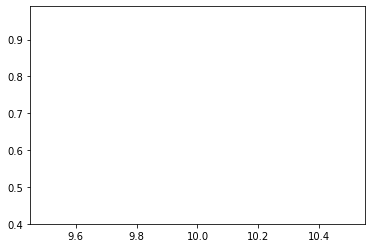

In [22]:
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r')
plt.ylim(0.4, .99);

df_scores

#### K-Nearest Neighbours

Score Train : 0.7661 
Score Test : 0.7100 
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      2819
           1       0.66      0.51      0.58      1792

    accuracy                           0.71      4611
   macro avg       0.70      0.67      0.68      4611
weighted avg       0.70      0.71      0.70      4611



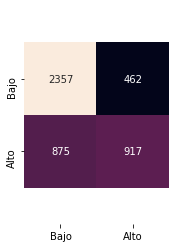

In [77]:
best_k = df_scores.loc[df_scores.score_medio ==\
                               df_scores.score_medio.max(),'n_neighbours'].values

model = KNeighborsClassifier(n_neighbors=best_k[0])
model.fit(X_train,y_train)

doMetrics(model,X_train,X_test,y_train,y_test)

#### Gaussian Naive Bayes

Score Train : 0.6100 
Score Test : 0.6155 
              precision    recall  f1-score   support

           0       0.82      0.48      0.60      2819
           1       0.50      0.84      0.63      1792

    accuracy                           0.62      4611
   macro avg       0.66      0.66      0.62      4611
weighted avg       0.70      0.62      0.61      4611



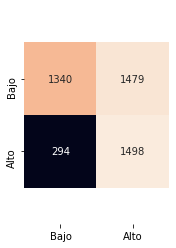

In [78]:
from sklearn.naive_bayes import GaussianNB

modelGaussianNB = GaussianNB()
modelGaussianNB.fit(X_train, y_train);
doMetrics(modelGaussianNB,X_train,X_test,y_train,y_test)

## Es el que mejor recall tiene, pero probemos cambiar el treshold

              precision    recall  f1-score   support

           0       0.80      0.59      0.68      2819
           1       0.54      0.77      0.64      1792

    accuracy                           0.66      4611
   macro avg       0.67      0.68      0.66      4611
weighted avg       0.70      0.66      0.66      4611



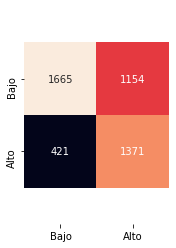

In [114]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
proba=pd.DataFrame(modelGaussianNB.predict_proba(X_test))


#y_pred = proba.loc[proba.loc[:,1]>0.5].loc[:,1]
y_pred = proba.loc[:,1]>0.95
mat=confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=["Bajo","Alto"], yticklabels=["Bajo","Alto"])
ax.set_ylim(2+0.5,-0.5,-0.5,-0.5);

#Native more data
print(classification_report(y_test,y_pred))


Con un treshold de .95 conseguimos reducir mas los FP aumentando relativamente muy poco los FN. lo elegímos porque maximiza los recursos del ministerio.

#### Multinomial Naive Bayes

Score Train : 0.7257 
Score Test : 0.7358 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2819
           1       0.68      0.60      0.64      1792

    accuracy                           0.74      4611
   macro avg       0.72      0.71      0.71      4611
weighted avg       0.73      0.74      0.73      4611



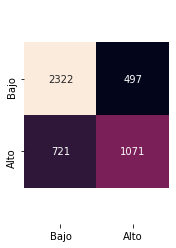

In [79]:
from sklearn.naive_bayes import MultinomialNB

# TODO TOFIX Acá se puede jugar con los hiperparametros
modelMultinomialNB = MultinomialNB(alpha=1.0e-10)
modelMultinomialNB.fit(X_train, y_train);
doMetrics(modelMultinomialNB,X_train,X_test,y_train,y_test)


#### Random Forest

Score Train : 0.7678 
Score Test : 0.7356 
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      2819
           1       0.71      0.53      0.61      1792

    accuracy                           0.74      4611
   macro avg       0.73      0.70      0.71      4611
weighted avg       0.73      0.74      0.73      4611



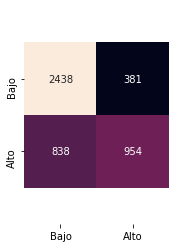

In [80]:
# TODO TOFIX Acá se puede jugar con los hiperparametros
modelRFC = RandomForestClassifier(n_jobs=-1, max_depth=10, n_estimators=15) 
modelRFC.fit(X_train, y_train);
doMetrics(modelRFC,X_train,X_test,y_train,y_test)

#### Gradient Boosting

Score Train : 0.7594 
Score Test : 0.7424 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2819
           1       0.69      0.61      0.65      1792

    accuracy                           0.74      4611
   macro avg       0.73      0.72      0.72      4611
weighted avg       0.74      0.74      0.74      4611



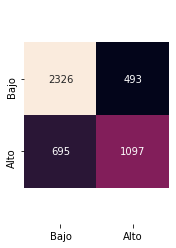

In [81]:
# TODO TOFIX Acá se puede jugar con los hiperparametros
modelGBC = GradientBoostingClassifier(n_estimators=32,learning_rate=0.8) 
modelGBC.fit(X_train, y_train);
doMetrics(modelGBC,X_train,X_test,y_train,y_test)

### 15. Descripción del dataset

Realizamos visualizaciones de distintas variables para evaluar las implicancias del mismo. Para acelerar el proceso, definimos una nueva función que construye un BarPlot de 2 variables.

In [28]:
def barplotear(dataf,col1,col2,ylabel,xlabel):
    plt.figure(figsize=(6,6))

    # set width of bar
    barWidth = 0.25
    bars1 = dataf[col1]
    bars2 = dataf[col2]

    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, width=barWidth, edgecolor='white', label=col1)
    #color='#7f6d5f',
    plt.bar(r2, bars2, width=barWidth, edgecolor='white', label=col2)
    #color='#557f2d', 

    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], dataf.index)

    plt.ylabel(ylabel,rotation='vertical')
    plt.xlabel(xlabel);
    
    
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    
    plt.legend()
    plt.show()
    #for tick in ax.get_xticklabels():
    #    tick.set_rotation(45)


### Evaluación de Riesgo vs. Género. 
#### Representación en términos Absolutos

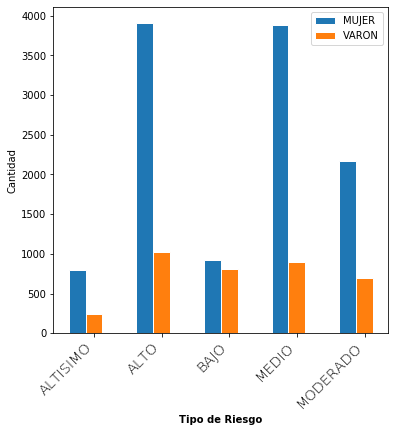

SEXO_GENERO,MUJER,VARON
ALTISIMO,795,240
ALTO,3915,1023
BAJO,925,810
MEDIO,3890,898
MODERADO,2173,699


In [29]:
group_name = df.groupby(['SEXO_GENERO', 'EVA_RIESGO'])
pivoted=group_name.size().unstack().T
pivoted.index = pivoted.index.array
barplotear(pivoted,"MUJER","VARON",'Cantidad',"Tipo de Riesgo")
pivoted

#### Representación en términos relativos

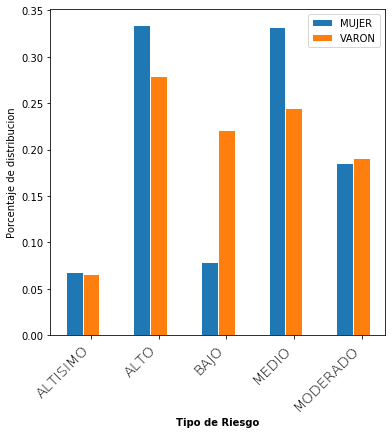

,MUJER,VARON
ALTISIMO,0.07,0.07
ALTO,0.33,0.28
BAJO,0.08,0.22
MEDIO,0.33,0.24
MODERADO,0.19,0.19


In [30]:
pivotedPercent=pd.DataFrame([pivoted[col]/pivoted[col].sum() for col in pivoted.columns])
barplotear(pivotedPercent.T,"MUJER","VARON",'Porcentaje de distribucion',"Tipo de Riesgo")
pivotedPercent.T


### Evaluación de Riesgo vs. Género del denunciado
#### Representación en términos absolutos

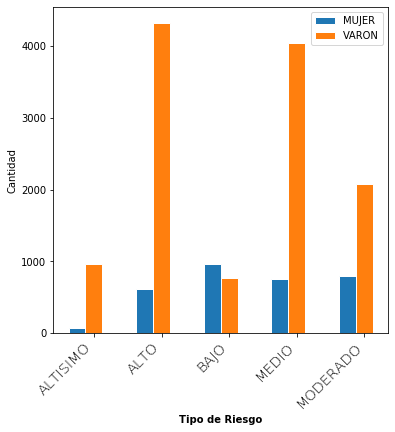

DENUNCIADA_SEXO_GENERO,MUJER,VARON
ALTISIMO,70,964
ALTO,611,4326
BAJO,961,774
MEDIO,753,4035
MODERADO,790,2082


In [31]:
group_name = df.groupby(['DENUNCIADA_SEXO_GENERO', 'EVA_RIESGO'])
pivoted=group_name.size().unstack().T
pivoted.index = pivoted.index.array
barplotear(pivoted,"MUJER","VARON",'Cantidad',"Tipo de Riesgo")
pivoted


#### Representación en términos relativos

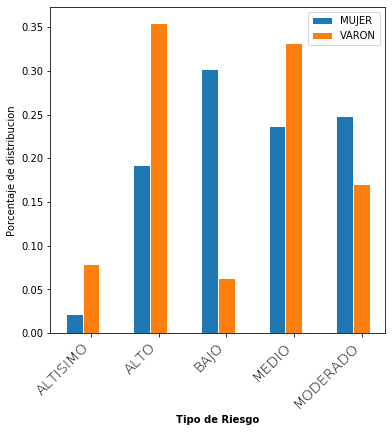

,MUJER,VARON
ALTISIMO,0.02,0.08
ALTO,0.19,0.36
BAJO,0.30,0.06
MEDIO,0.24,0.33
MODERADO,0.25,0.17


In [32]:
pivotedPercent=pd.DataFrame([pivoted[col]/pivoted[col].sum() for col in pivoted.columns])
barplotear(pivotedPercent.T,"MUJER","VARON",'Porcentaje de distribucion',"Tipo de Riesgo")
pivotedPercent.T


### Evaluación de riesgo vs Nacionalidad
#### Representación en términos absolutos

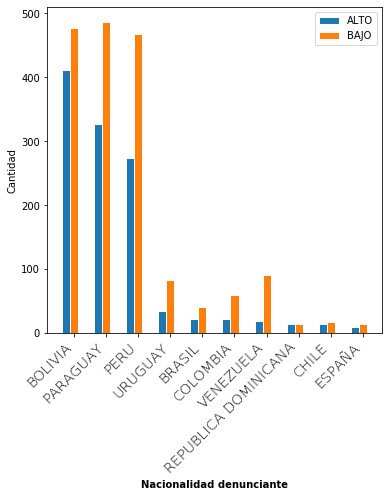

TIPO_RIESGO,ALTO,BAJO
ARGENTINA,4798.00,7600.00
BOLIVIA,411.00,477.00
PARAGUAY,326.00,486.00
PERU,274.00,467.00
URUGUAY,34.00,83.00
BRASIL,21.00,40.00
COLOMBIA,21.00,59.00
VENEZUELA,18.00,91.00
REPUBLICA DOMINICANA,14.00,13.00
CHILE,13.00,16.00


In [33]:
df["TIPO_RIESGO"] = y.replace(1, "ALTO").replace(0, "BAJO")  

group_name = df.groupby(['NACIONALIDAD', 'TIPO_RIESGO'])
pivoted=group_name.size().unstack()
pivoted.index = pivoted.index.array
pivoted=pivoted.fillna(0)
barplotear(pivoted.drop("ARGENTINA",axis=0).sort_values(by=['ALTO'],ascending=False).head(10),"ALTO","BAJO",'Cantidad',"Nacionalidad denunciante")
pivoted.sort_values(by=['ALTO'],ascending=False).head(10)


#### Representación en términos relativos

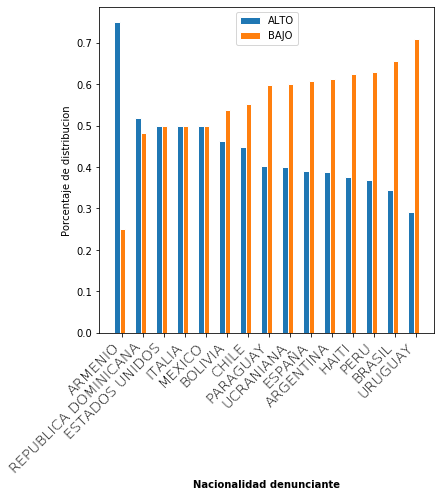

TIPO_RIESGO,ALTO,BAJO
ALEMANIA,0.00,1.00
ARGENTINA,0.39,0.61
ARGENTINA - ESPAÑOLA,0.50,0.50
ARMENIO,0.75,0.25
BOLIVIA,0.46,0.54
BRASIL,0.34,0.66
CHILE,0.45,0.55
CHINA,1.00,0.00
COLOMBIA,0.26,0.74
COREA DEL SUR,1.00,0.00


In [34]:
pivotedT=pivoted.T
pivotedPercent=pd.DataFrame([pivotedT[col]/pivotedT[col].sum() for col in pivotedT.columns])
barplotear(pivotedPercent.loc[pivoted["ALTO"]+pivoted["BAJO"]>2].sort_values(by=['ALTO'],ascending=False).head(15),"ALTO","BAJO",'Porcentaje de distribucion',"Nacionalidad denunciante")
pivotedPercent

#### Evaluación de Riesgo vs Edad del denunciante
### Representación en términos absolutos

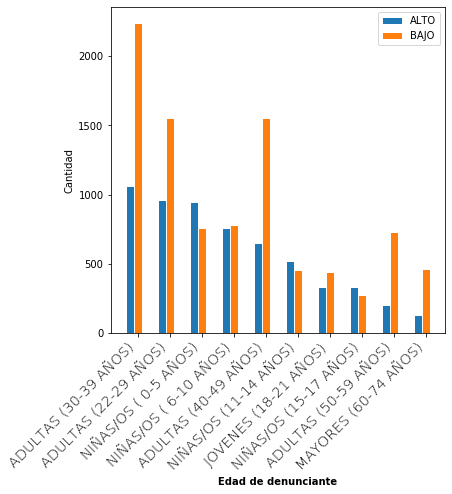

TIPO_RIESGO,ALTO,BAJO
ADULTAS (30-39 AÑOS),1064,2243
ADULTAS (22-29 AÑOS),962,1551
NIÑAS/OS ( 0-5 AÑOS),947,760
NIÑAS/OS ( 6-10 AÑOS),756,779
ADULTAS (40-49 AÑOS),648,1551
NIÑAS/OS (11-14 AÑOS),520,456
JOVENES (18-21 AÑOS),335,439
NIÑAS/OS (15-17 AÑOS),331,274
ADULTAS (50-59 AÑOS),204,733
MAYORES (60-74 AÑOS),133,465


In [35]:
#df["TIPO_RIESGO"] = y.replace(1, "ALTO").replace(0, "BAJO")  

group_name = df.groupby(['GRUPO_EDAD', 'TIPO_RIESGO'])
pivoted=group_name.size().unstack()
pivoted.index = pivoted.index.array
pivoted=pivoted.fillna(0)
barplotear(pivoted.sort_values(by=['ALTO'],ascending=False).head(10),"ALTO","BAJO",'Cantidad',"Edad de denunciante")
pivoted.sort_values(by=['ALTO'],ascending=False).head(10)


#### Representación en términos absolutos

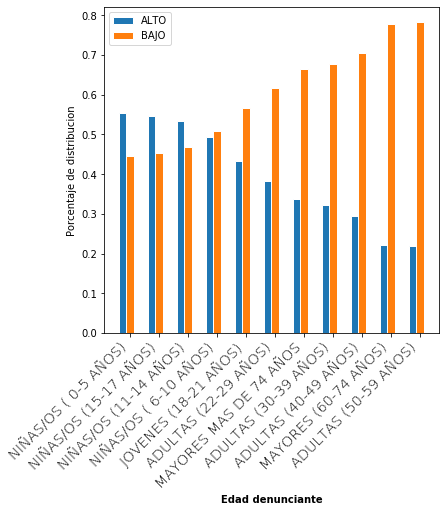

TIPO_RIESGO,ALTO,BAJO
NIÑAS/OS ( 0-5 AÑOS),0.55,0.45
NIÑAS/OS (15-17 AÑOS),0.55,0.45
NIÑAS/OS (11-14 AÑOS),0.53,0.47
NIÑAS/OS ( 6-10 AÑOS),0.49,0.51
JOVENES (18-21 AÑOS),0.43,0.57
ADULTAS (22-29 AÑOS),0.38,0.62
MAYORES MAS DE 74 AÑOS,0.34,0.66
ADULTAS (30-39 AÑOS),0.32,0.68
ADULTAS (40-49 AÑOS),0.29,0.71
MAYORES (60-74 AÑOS),0.22,0.78


In [36]:
pivotedT=pivoted.T
pivotedPercent=pd.DataFrame([pivotedT[col]/pivotedT[col].sum() for col in pivotedT.columns])
barplotear(pivotedPercent.sort_values(by=['ALTO'],ascending=False).head(15),"ALTO","BAJO",'Porcentaje de distribucion',"Edad denunciante")
pivotedPercent.sort_values(by=['ALTO'],ascending=False)

### Evaluación de Riesgo vs Edad del denunciado
#### Representación en términos absolutos

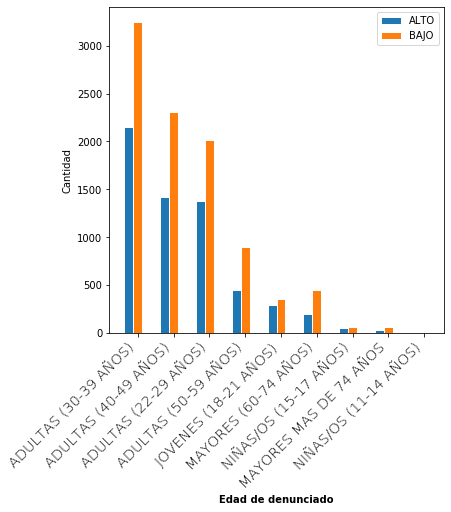

TIPO_RIESGO,ALTO,BAJO
ADULTAS (30-39 AÑOS),2151,3244
ADULTAS (40-49 AÑOS),1418,2305
ADULTAS (22-29 AÑOS),1374,2019
ADULTAS (50-59 AÑOS),446,897
JOVENES (18-21 AÑOS),289,358
MAYORES (60-74 AÑOS),199,452
NIÑAS/OS (15-17 AÑOS),56,57
MAYORES MAS DE 74 AÑOS,30,60
NIÑAS/OS (11-14 AÑOS),8,3


In [37]:
#df["TIPO_RIESGO"] = y.replace(1, "ALTO").replace(0, "BAJO")  

group_name = df.groupby(['DENUNCIADA_EDAD', 'TIPO_RIESGO'])
pivoted=group_name.size().unstack()
pivoted.index = pivoted.index.array
pivoted=pivoted.fillna(0)
barplotear(pivoted.sort_values(by=['ALTO'],ascending=False).head(10),"ALTO","BAJO",'Cantidad',"Edad de denunciado")
pivoted.sort_values(by=['ALTO'],ascending=False).head(10)


#### Representación en términos absolutos

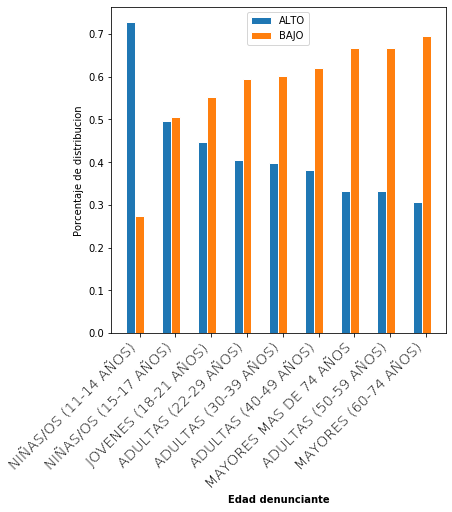

TIPO_RIESGO,ALTO,BAJO
NIÑAS/OS (11-14 AÑOS),0.73,0.27
NIÑAS/OS (15-17 AÑOS),0.50,0.50
JOVENES (18-21 AÑOS),0.45,0.55
ADULTAS (22-29 AÑOS),0.40,0.60
ADULTAS (30-39 AÑOS),0.40,0.60
ADULTAS (40-49 AÑOS),0.38,0.62
MAYORES MAS DE 74 AÑOS,0.33,0.67
ADULTAS (50-59 AÑOS),0.33,0.67
MAYORES (60-74 AÑOS),0.31,0.69


In [38]:
pivotedT=pivoted.T
pivotedPercent=pd.DataFrame([pivotedT[col]/pivotedT[col].sum() for col in pivotedT.columns])
barplotear(pivotedPercent.sort_values(by=['ALTO'],ascending=False).head(15),"ALTO","BAJO",'Porcentaje de distribucion',"Edad denunciante")
pivotedPercent.sort_values(by=['ALTO'],ascending=False)